## seaborn
* 主要是在matplotlib上的数据可视化
* matplotlib 是高度可定制的，但是很难知道具体的设置，seaborn带有一些定制的主题和一个控制matplotlib数字外观的界面

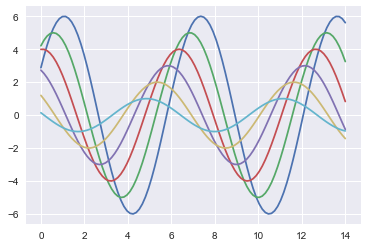

In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(sum(map(ord, 'aesthetics')))

def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
        
sns.set() # 使用 seaborn 的默认主题
sinplot()
plt.show()

**要控制风格 使用 axes_style(),set_style()**
**要缩放图 使用 plotting_context(), set_context()**

第一个参数返回一个参数字典，第二个函数设置 matplotlib的默认值

## seaborn的图样式
* darkgrid(默认的主题)
* whitegrid
* dark 不带网格
* white
* ticks

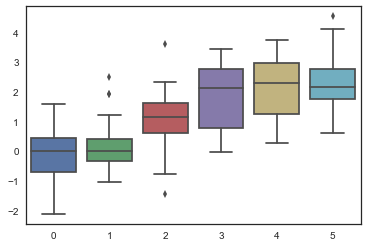

In [30]:
sns.set_style("white") # 设置主题, 带网格
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)
plt.show()

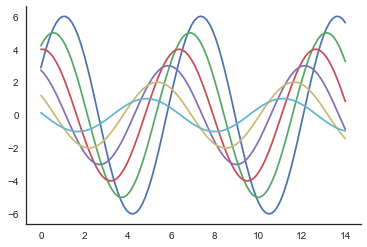

In [31]:
sinplot()
sns.despine()
plt.show()

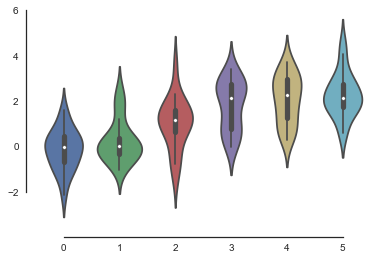

In [32]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True)
plt.show()

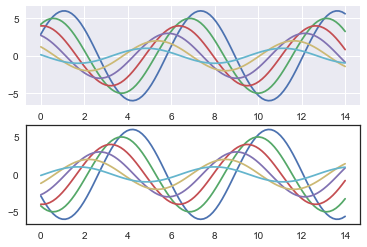

In [34]:
with sns.axes_style("darkgrid"): # with 在这里临时设置主题，而 sns.set_style() 是全局设置
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)
plt.show()

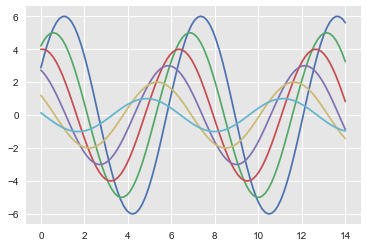

In [40]:
sns.axes_style() # 设置的参数，可以自定义主题
sns.set_style('darkgrid', {"axes.facecolor": ".9"})
sinplot()
plt.show()

## 缩放 set()
* 大小顺序
    * paper
    * notebook 默认
    * talk
    * poster

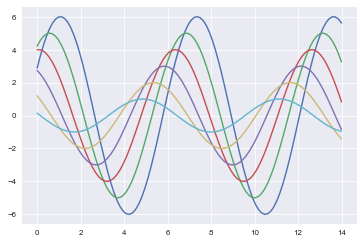

In [47]:
sns.set_context("paper") # 设置缩放, 线条的粗细， 同样可以自定义
sinplot()
plt.show()

## 选择调色板

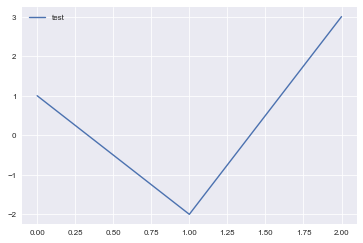

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([1, -2, 3], label='test')

ax.legend()
plt.show()

In [53]:
sns.set_style("whitegrid")

* colorpalette() 是一个调色板函数
* set_palette() 全局设置，可以使用 with进行局部设置
* 如果要区分不具有固有顺序的离散数据块，定性（或分类）调色板是最好的选择。


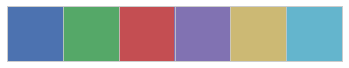

In [58]:
current_palette = sns.color_palette() # 默认的调色板
sns.palplot(current_palette) # 调色板绘图
plt.show() 

* 有 6 个不同的默认主题
    * deep
    * muted
    * pastel
    * bright
    * dark
    * colorblind
* 当有六个以上的类别可以区分时，最简单的方法是在圆形的颜色空间中绘制均匀间隔的颜色（例如，保持亮度和饱和度不变的色调发生变化）。这是大多数seaborn函数在默认颜色循环中需要使用比当前设置更多的颜色时所默认的功能。

* 最常用的方法是使用hls颜色空间，这是RGB值的简单转换

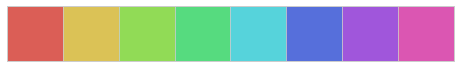

In [59]:
sns.palplot(sns.color_palette("hls", 8)) # 默认8种颜色
plt.show()

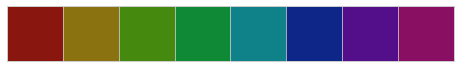

In [60]:
sns.palplot(sns.hls_palette(8, l=.3, s=.8)) # 可以调整亮度和饱和度
plt.show()

* 然而，由于人类视觉系统的工作方式，在RGB级别上甚至是“强度”的颜色不一定看起来同样强烈。我们认为黄色和绿色相对较亮，蓝色较暗，当与hls系统一致时，这可能是一个问题。

* 为了解决这个问题，seaborn提供了一个连接到husl系统的界面，这也使得选择均匀间隔的色调变得容易，同时保持明显的亮度和饱和度更加均匀

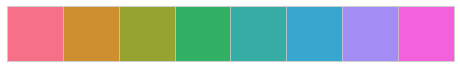

In [63]:
sns.palplot(sns.color_palette("husl", 8)) # 更加均匀的颜色，husl_palette() 更灵活的借口
plt.show()

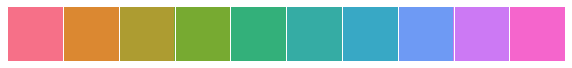

In [70]:
sns.palplot(sns.husl_palette(10))
plt.show()

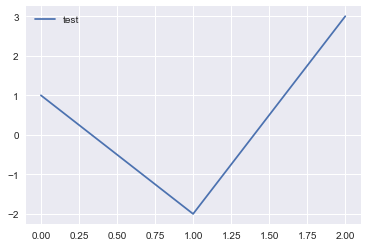

In [66]:
import matplotlib.pyplot as plt

sns.set() # 表示设置新的主题，也意味着上一个设定一定失效
fig, ax = plt.subplots()
ax.plot([1, -2, 3], label='test')

ax.legend()
plt.show()

* 避免使用红绿色

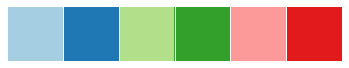

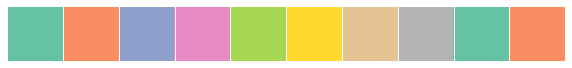

In [71]:
sns.palplot(sns.color_palette("Paired"))
sns.palplot(sns.color_palette("Set2", 10))
plt.show()

## 顺序调色板
* 当数据范围从相对较低或不中断的值到相对较高或有趣的值时，这种颜色映射是适当的
* 对于顺序数据，最好使用最多具有相对微妙色调变化的调色板，伴随着亮度和饱和度的较大变化。这种方法自然会吸引数据中相对重要的部分

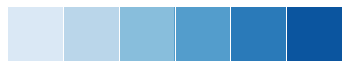

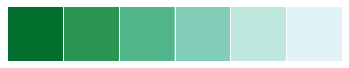

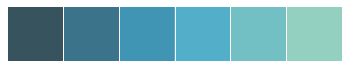

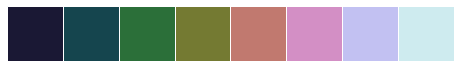

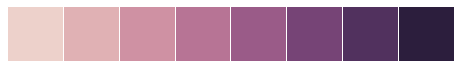

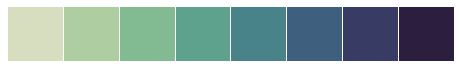

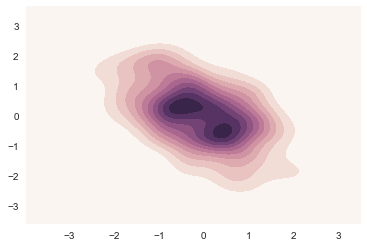

In [76]:
sns.palplot(sns.color_palette("Blues")) # 一组有顺序的蓝色
sns.palplot(sns.color_palette("BuGn_r"))
# Seaborn还增加了一个技巧，可以让你创建“黑暗”的调色板，它没有一个广泛的动态范围。如果您想要顺序绘制线条或点，
# 这可能会很有用，否则难以区分较亮的线条。

sns.palplot(sns.color_palette("GnBu_d"))
sns.palplot(sns.color_palette("cubehelix", 8)) # 用于打印时使用
sns.palplot(sns.cubehelix_palette(8)) # 更重要的颜色更深
# Other arguments to cubehelix_palette() control how the palette looks. The two main things you’ll 
# change are the start (a value between 0 and 3) and rot, or number of rotations (an arbitrary value, 
# but probably within -1 and 1),
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))
# By default you just get a list of colors, like any other seaborn palette, 
# but you can also return the palette as a colormap object that can be passed to seaborn or matplotlib functions using as_cmap=True.
plt.show()

x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True)

plt.show()

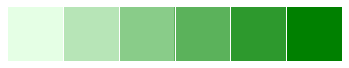

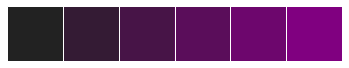

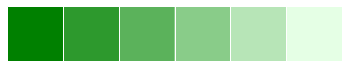

In [78]:
sns.palplot(sns.light_palette("green")) # 亮度变化
sns.palplot(sns.dark_palette("purple")) # 黑度变化
sns.palplot(sns.light_palette("green", reverse=True)) # 可以定义其翻转
plt.show()

## 发散的调色板
* 第三类调色板被称为“发散”。这些数据用于大数值低值和高值数据。数据中通常也有明确的中点。例如，如果从某个基线时间点绘制温度变化，则最好使用分散的颜色映射来显示相对减少的区域和相对增加的区域。

* 除了现在你想要有两个相对微妙的色调变化，从不同的起始色调，在中间点的不足重点的颜色相遇，选择好的发散调色板的规则是相似的。起始值具有相似的亮度和饱和度也很重要。

* 在这里强调也应该避免使用**红色和绿色**，因为大量的潜在观众将无法区分它们。

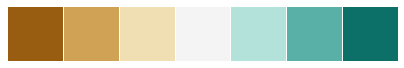

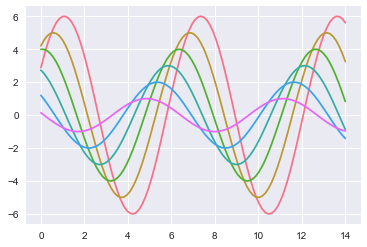

In [79]:
sns.palplot(sns.color_palette("BrBG", 7)) # default,也可以自定义
plt.show()
plt.figure()
sns.set_palette("husl") # 设置调色板
sinplot()
plt.show()

* 临时更改和永久更改使用的函数不同

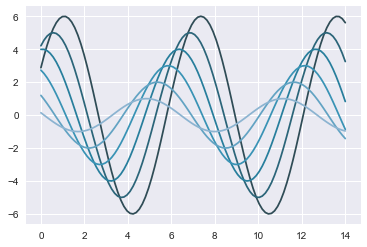

In [82]:
with sns.color_palette("PuBuGn_d"): # 临时更改
    sinplot()
plt.show()